In [504]:
#Importing libraries
import numpy as np
import pandas as pd

import os
import json
import shap
import dill
import matplotlib.pyplot as plt
from collections import Counter
from PIL import  Image
%matplotlib inline

import pandas as pd
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

import xgboost as xgb
import catboost as catb
import lightgbm as lgbm
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SMOTE

from scipy.stats import shapiro, probplot, ttest_ind, mannwhitneyu, chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, scorer, log_loss
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score, cohen_kappa_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# –ò–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –ø–æ —É—Å—Ç–∞–Ω–æ–≤–∫–µ –ø–∞–∫–µ—Ç–∞: https://github.com/maks-sh/scikit-uplift
# –°—Å—ã–ª–∫–∞ –Ω–∞ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—é: https://scikit-uplift.readthedocs.io/en/latest/
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel
from sklift.models import ClassTransformation

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold
from pylab import rcParams

rcParams['figure.figsize'] = 8, 5
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-whitegrid')

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ

1. –°–∫–∞—á–∞—Ç—å –ª—é–±–æ–π –ø–æ–Ω—Ä–∞–≤–∏–≤—à–∏–π—Å—è –≤–∞–º –¥–∞—Ç–∞—Å–µ—Ç —Å UCI repository(–º–æ–∂–µ—Ç–µ –¥–∞–∂–µ —Å–≤–æ–π –∫–∞–∫–æ–π-—Ç–æ –≤–∑—è—Ç—å) –∏ —Å—Ä–∞–∑—É –∂–µ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ –µ–≥–æ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏. –¢–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ –Ω–∞ –¥–∏—Å–∫ –∏ –±–æ–ª—å—à–µ –Ω–µ —Ç—Ä–æ–≥–∞–π—Ç–µ.

In [6]:
#—Å–∫–∞—á–∞–ª –¥–∞—Ç–∞—Å–µ—Ç –æ—Ç—Å—é–¥–∞ https://www.kaggle.com/CooperUnion/cardataset
df = pd.read_csv("hw8_data.csv")

In [7]:
df.shape

(11914, 16)

In [8]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [36]:
[x for x in features if x not in num_features]

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [37]:
target = 'MSRP'
features = list(df.columns[:15])
num_features = list(df_train.corr().columns)
dum_features = [x for x in features if x not in num_features]
y = df[target]
X = df[features]

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [352]:
#save test
X_test.to_csv("hw8_X_test.csv", index=None)
y_test.to_csv("hw8_y_test.csv", index=None)
#save train
X_train.to_csv("hw8_X_train.csv", index=None)
y_train.to_csv("hw8_y_train.csv", index=None)

In [353]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.shape

(8935, 16)

2. –ü—Ä–æ–≤–µ—Å—Ç–∏ EDA

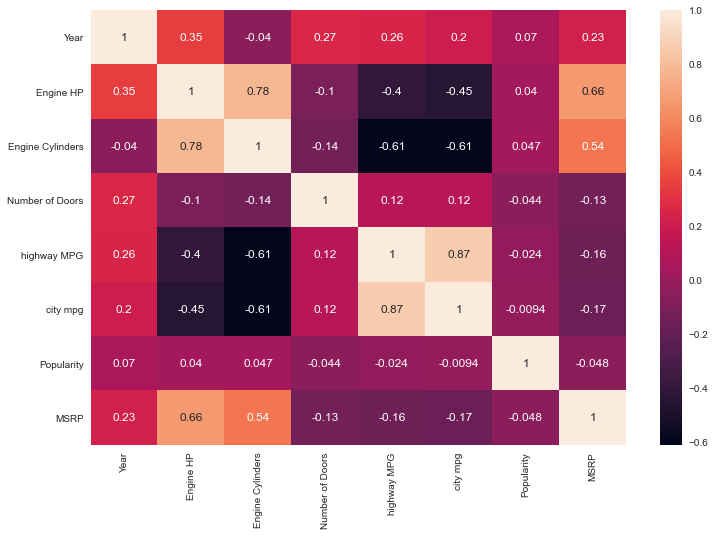

In [24]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞
rcParams['figure.figsize'] = 12, 8
sns.heatmap(df_train.corr(), annot=True)

–ö–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ:

- –ú–æ—â–Ω–æ—Å—Ç—å –∞–≤—Ç–æ Engine HP
- –ö–æ–ª-–≤–æ —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤ Engine Cylinders

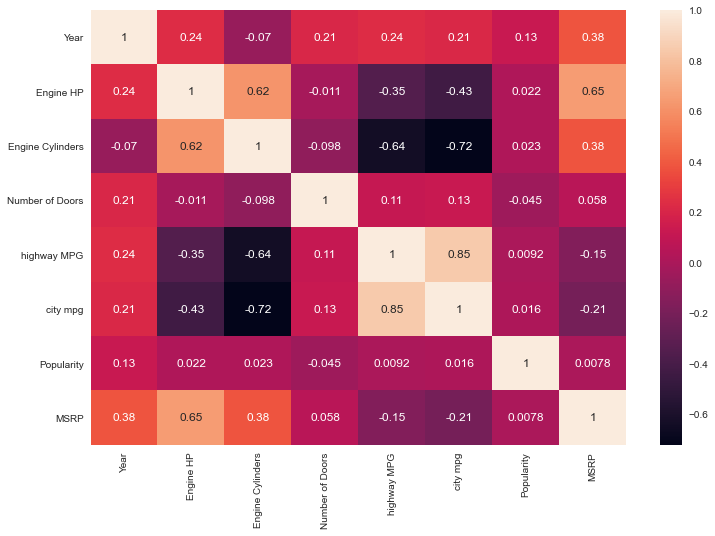

In [33]:
#–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ö–µ–Ω–¥–∞–ª–ª—É
sns.heatmap(df_train.corr(method='kendall'), annot=True)

–í–∏–¥–Ω–∞ —Ç–∞–∫–∂–µ –∑–Ω–∞—á–∏–º–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ –ö–µ–Ω–¥–∞–ª–ª—É –º–µ–∂–¥—É –≥–æ–¥–æ–º –≤—ã–ø—É—Å–∫–∞ –∏ —Ü–µ–Ω–æ–π

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:

In [25]:
def extend_describe_for_num_values(df, col_lst, target_name):
    #–§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–ø.–¥–∞–Ω–Ω—ã–µ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —Ç–∞–±–ª–∏—Ü–æ–π describe: 
    # - –¥–∏—Å–ø–µ—Ä—Å–∏—é
    # - –∫–æ–ª-–≤–æ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    # - –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    # - –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ü–∏—Ä—Å–æ–Ω–∞ —Å —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º
    # - p-value –ø–æ —Ç–µ—Å—Ç—É –®–∞–ø–∏—Ä–æ –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    # - p-value –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –æ —Ä–∞–≤–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –º–∞—Ç. –æ–∂–∏–¥–∞–π–Ω–∏—è –º–µ–∂–¥—É —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∫–ª–∞—Å—Å–æ–≤ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
    
    df_describe = df[col_lst].describe()
    df_desc_add = pd.DataFrame(columns=col_lst)
    for _ in range(5):
        df_desc_add = df_desc_add.append(pd.Series(), ignore_index=True)
    
    
    for v in col_lst:
        df_desc_add[v].iloc[[0]] = np.var(df[v])
        df_desc_add[v].iloc[[1]] = df[df[v].isnull()].shape[0]
        df_desc_add[v].iloc[[2]] = df[v].nunique()
        df_notna = df.loc[df[v].notna()]
        shapiro_p_value = shapiro(df_notna[v])[1]
        df_desc_add[v].iloc[[3]] = shapiro_p_value
        if shapiro_p_value < 0.05:
            v_target_0 = df_notna.loc[df_notna[target_name]==0, v]
            v_target_1 = df_notna.loc[df_notna[target_name]==1, v]
            df_desc_add[v].iloc[[4]] = mannwhitneyu(v_target_0, v_target_1)[1]
    
    df_corr = pd.DataFrame(df[col_lst + [target_name]].corr().iloc[:-1, -1]).T

    df_desc_add.rename(index={0:'var', 1:'null', 2:'nunique', 3:'shapiro p-value', 4:'mannw p-value'}, inplace=True)
    df_corr.rename(index={target_name:'corr'}, inplace=True)
    
    df2 = pd.concat([df_describe, df_desc_add, df_corr])
    
    return df2

In [31]:
extend_describe_for_num_values(df_train, num_features, target)

Year Engine HP Engine Cylinders Number of Doors  \
count                8935      8886             8915            8929   
mean              2010.43   249.404          5.62524         3.44294   
std               7.53745   109.654          1.77892        0.877791   
min                  1990        55                0               2   
25%                  2007       170                4               2   
50%                  2015       225                6               4   
75%                  2016       302                6               4   
max                  2017      1001               16               4   
var               56.8068   12022.6          3.16421        0.770431   
null                    0        49               20               6   
nunique                28       348                9               3   
shapiro p-value         0         0                0               0   
mannw p-value           0         0                0               0   
corr             0.230367  0.663425         0.536207       -0.133273   

                highway MPG  city mpg   Popularity         MSRP  
count                  8935      8935         8935         8935  
mean                26.6542   19.7126      1568.28      40692.4  
std                  8.8661   8.63955      1453.22      59578.5  
min                      12         8            2         2000  
25%                      22        16          549      21077.5  
50%                      26        18         1385        29990  
75%                      30        22         2009      42492.5  
max                     354       137         5657   2.0659e+06  
var                 78.5989   74.6335  2.11163e+06  3.54919e+09  
null                      0         0            0            0  
nunique                  57        65           48         5050  
shapiro p-value           0         0            0            0  
mannw p-value             0         0            0            0  
corr              -0.161216 -0.166462   -0.0480313            1

- –í—Å–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ (–ó–Ω–∞—á–µ–Ω–∏–µ –ö—Ä–∏—Ç–µ—Ä–∏—è –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–∏–∂–µ –ø–æ—Ä–æ–≥–æ–≤–æ–≥–æ ùëù - ùë£ùëéùëôùë¢ùëí<0.05 )
- –ï—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Engine HP, Engine Cylinders, Number of Doors, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å

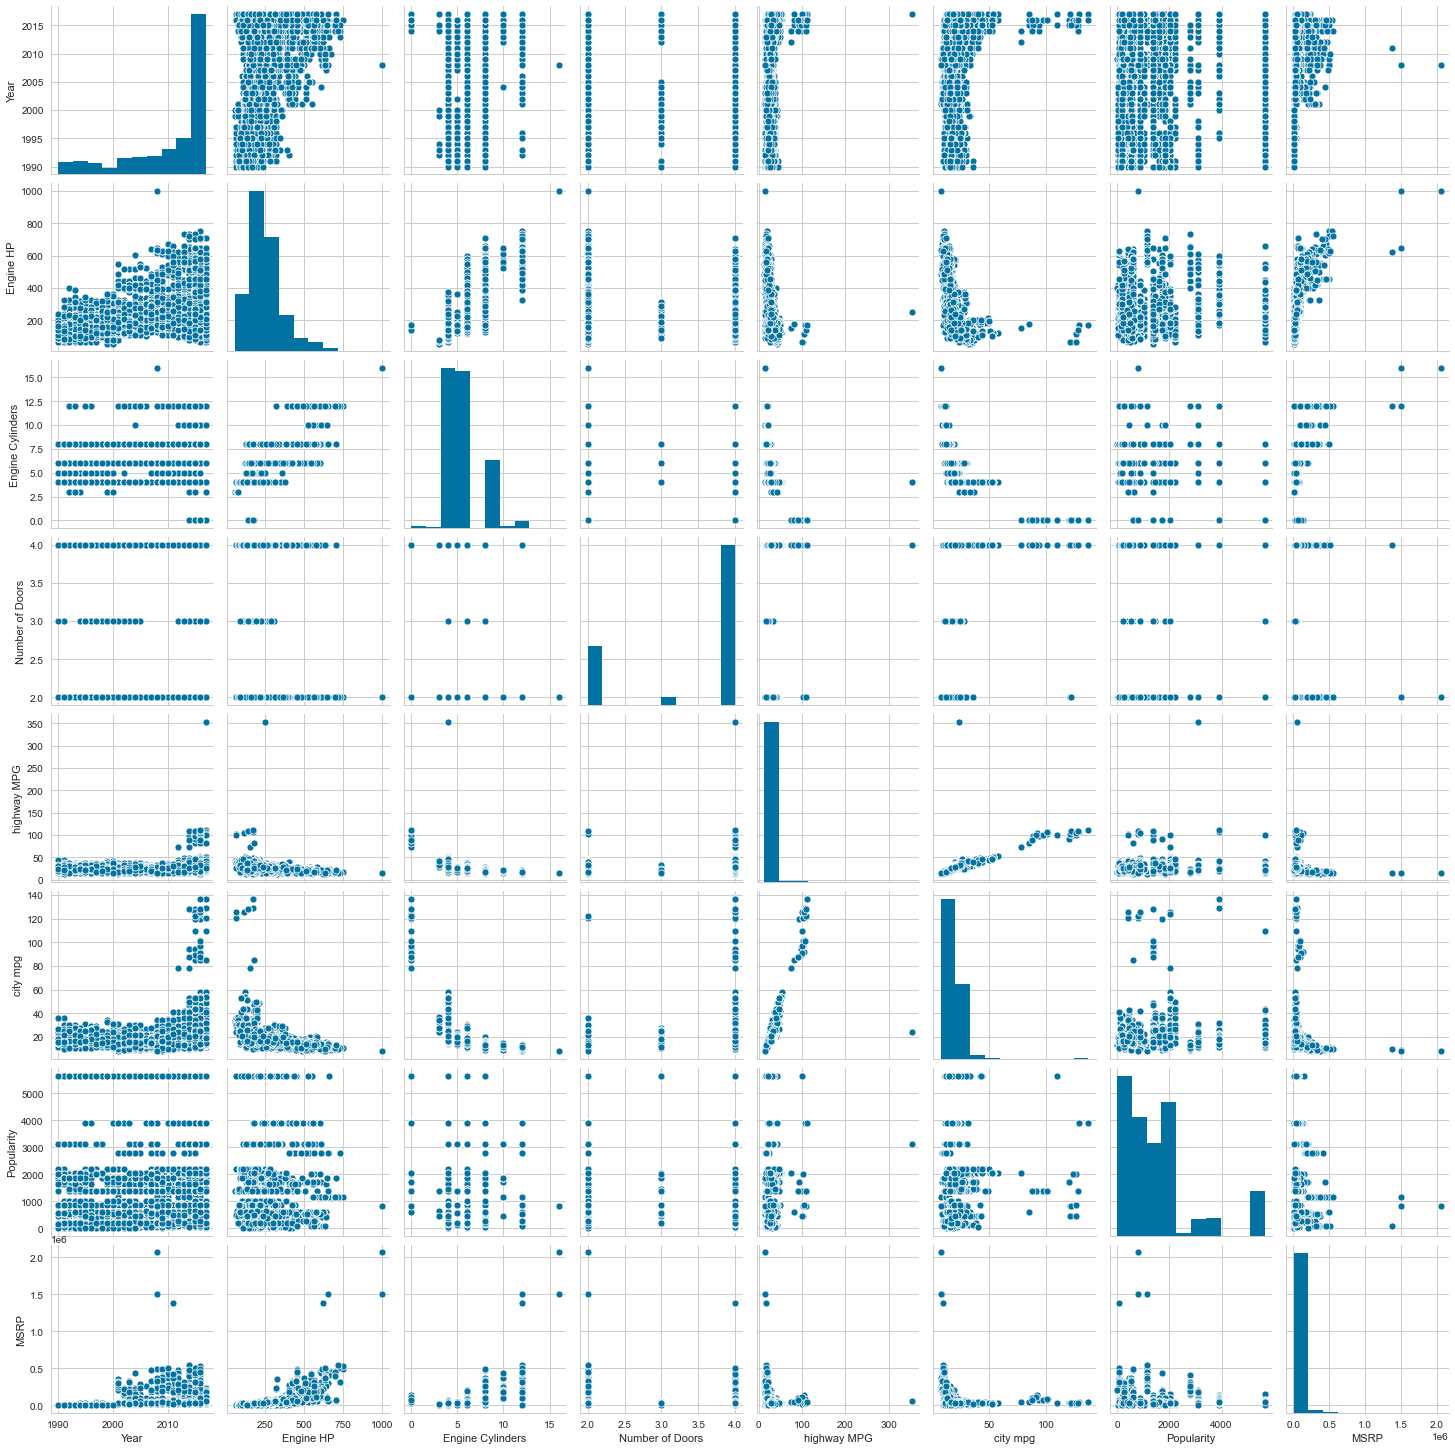

In [32]:
sns_plot = sns.pairplot(df_train[num_features])
# sns_plot.savefig('pairplot.png')

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [34]:
def extend_describe_for_dummies_values(df, col_lst, target_name, col_for_count):
    """–§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç –∏ –≤—ã–≤–æ–¥–∏—Ç:
    –∫–æ–ª-–≤–æ –≤—Å–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–π
    –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    –∫–æ–ª-–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤
    p-value –¥–ª—è –∫—Ä–∏—Ç–µ—Ä–∏—è –•–∏-–ö–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞
    """
    df_desc = pd.DataFrame(columns=col_lst)
    n = df.shape[0]
    
    for _ in range(5):
        df_desc = df_desc.append(pd.Series(), ignore_index=True)
    
    for v in col_lst:
        df_desc[v].iloc[[0]] = df[v].count()
        df_desc[v].iloc[[1]] = len(df[v].unique())
        
        null_amount = df.loc[df[v].isnull()].shape[0]
        df_desc[v].iloc[[2]] = null_amount
        df_desc[v].iloc[[3]] = round((1-null_amount/n) * 100, 2)
        
        #–ö—Ä–∏—Ç–µ—Ä–∏–π –•–∏-–ö–≤–∞–¥—Ä–∞—Ç –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è p-value
        table = df.pivot_table(values=col_for_count, index=v, columns=target_name, aggfunc='count')
        table.fillna(0, inplace=True)
        if table.shape[0] > 0:
            chi2, p, dof, expected = chi2_contingency(table, correction=False)
        else:
            p='-'
        df_desc[v].iloc[[4]] = p

    df_desc.rename(index={0:'count', 1:'uniques', 2:'null', 3:'fullness', 4:'p-value'}, inplace=True)

    return df_desc

In [38]:
extend_describe_for_dummies_values(df_train, dum_features, target, 'Year')

Make Model Engine Fuel Type Transmission Type Driven_Wheels  \
count     8935  8935             8932              8935          8935   
uniques     48   896               11                 5             4   
null         0     0                3                 0             0   
fullness   100   100            99.97               100           100   
p-value      0     0                0       0.000177973   5.47363e-84   

         Market Category Vehicle Size Vehicle Style  
count               6137         8935          8935  
uniques               70            3            16  
null                2798            0             0  
fullness           68.68          100           100  
p-value                0  4.27721e-54   4.31388e-29

- –£ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ p-value < 0.05, –∞ –∑–Ω–∞—á–∏—Ç –∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Ä–∞–∑–Ω–æ–º—É –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.
- –ï—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Engine Fuel Type, –∏—Ö –Ω—É–∂–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å
- –ü—Ä–æ–ø—É—Å–∫–æ–≤ –≤ Market Category –æ—á–µ–Ω—å –º–Ω–æ–≥–æ - —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –≤–æ–∑–º–æ–∂–Ω–æ –ø—Ä–∏–¥–µ—Ç—Å—è –æ—Ç–±—Ä–æ—Å–∏—Ç—å

In [57]:
df_train['Vehicle Size'].value_counts()

Compact    3574
Midsize    3283
Large      2078
Name: Vehicle Size, dtype: int64

In [58]:
df_train['Vehicle Style'].value_counts()

Sedan                  2334
4dr SUV                1850
Coupe                   873
Convertible             599
4dr Hatchback           535
Crew Cab Pickup         506
Extended Cab Pickup     465
Wagon                   439
2dr Hatchback           395
Passenger Minivan       317
Regular Cab Pickup      275
2dr SUV                 107
Passenger Van            92
Cargo Van                70
Cargo Minivan            55
Convertible SUV          23
Name: Vehicle Style, dtype: int64

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏:

In [40]:
df_train['Engine Fuel Type'].value_counts()

regular unleaded                                5357
premium unleaded (required)                     1555
premium unleaded (recommended)                  1134
flex-fuel (unleaded/E85)                         660
diesel                                           117
electric                                          45
flex-fuel (premium unleaded required/E85)         35
flex-fuel (premium unleaded recommended/E85)      22
flex-fuel (unleaded/natural gas)                   5
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [49]:
list(df_train['Market Category'].value_counts().index)

['Crossover',
 'Luxury',
 'Flex Fuel',
 'Luxury,Performance',
 'Hatchback',
 'Performance',
 'Crossover,Luxury',
 'Luxury,High-Performance',
 'Exotic,High-Performance',
 'Hatchback,Performance',
 'Factory Tuner,Luxury,High-Performance',
 'High-Performance',
 'Hybrid',
 'Crossover,Luxury,Performance',
 'Factory Tuner,High-Performance',
 'Factory Tuner,Performance',
 'Flex Fuel,Performance',
 'Diesel',
 'Hatchback,Hybrid',
 'Exotic,Luxury,High-Performance',
 'Crossover,Performance',
 'Crossover,Hatchback',
 'Crossover,Flex Fuel',
 'Luxury,Hybrid',
 'Exotic,Factory Tuner,Luxury,High-Performance',
 'Hatchback,Luxury',
 'Diesel,Luxury',
 'Crossover,Hybrid',
 'Hatchback,Luxury,Performance',
 'Exotic,Luxury,Performance',
 'Crossover,Luxury,Diesel',
 'Flex Fuel,Luxury',
 'Flex Fuel,Luxury,High-Performance',
 'Factory Tuner,Luxury,Performance',
 'Crossover,Factory Tuner,Luxury,High-Performance',
 'Flex Fuel,Luxury,Performance',
 'Hatchback,Factory Tuner,Performance',
 'Crossover,Luxury,Hybrid',

3. –°–¥–µ–ª–∞—Ç—å feature engineering. –ü—Ä–∏ —ç—Ç–æ–º –ø–æ—Å—Ç–∞—Ä–∞–π—Ç–µ—Å—å ¬´–∑–∞–≤–µ—Ä–Ω—É—Ç—å¬ª –≤–∞—à –∫–æ–¥ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –≤ –∫–ª–∞—Å—Å—ã –∏–ª–∏ —Ñ—É–Ω–∫—Ü–∏–∏ (–ø—Ä–∏–º–µ—Ä Transformer –∫–∞–∫ –≤ –Ω–æ—É—Ç–±—É–∫–µ)

–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö:

In [322]:
#–û–±—â–∞—è —Ñ—É–Ω–∫—Ü–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞
def group_and_get_max_column_for_transform(df, group_cols, get_max_col, count_col):
    """
    –ó–∞–ø–æ–ª–Ω—è–µ—Ç –ø—Ä–æ–ø—É—Å–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–π –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –ø–æ –∫–æ–ª-–≤—É –∑–Ω–∞—á–µ–Ω–∏–π –≤ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–µ
    group_cols - —Å–ø–∏—Å–æ–∫ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –¥–ª—è –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏
    get_max_col - –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –∫–æ—Ç–æ—Ä—ã–π –Ω—É–∂–Ω–æ –¥–æ–∑–∞–ø–æ–ª–Ω–∏—Ç—å
    count_col - –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∫–æ–ª-–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤
    –Ω–∞ –≤—ã—Ö–æ–¥–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ group_cols –∏ –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞ get_max_col –¥–ª—è –ø–æ–¥—Å—Ç–∞–Ω–æ–≤–∫–∏
    """
    all_group_cols = group_cols + [get_max_col]
    group_1 = df.groupby(all_group_cols, 
                    as_index=False).agg({count_col: "count"})
    group_2 = group_1.groupby(group_cols, 
                    as_index=False).agg({count_col: "max"})
    
    final_cols = group_cols + [count_col]
    
    final_group = pd.merge(group_2, group_1, on=final_cols, how='left').rename(columns={get_max_col: 'max_value'})
    final_group.drop(count_col, axis=1, inplace=True)
    final_group.drop_duplicates(group_cols, keep='first', inplace=True)
    
    return final_group

In [408]:
class Fillna_max_value_by_group(BaseEstimator, TransformerMixin):
    def __init__(self, group_cols, get_max_col, count_col):
        self.group_cols = group_cols
        self.get_max_col = get_max_col
        self.count_col = count_col

    def fit(self, X, y=None):
        self.final_group = group_and_get_max_column_for_transform(X, self.group_cols, self.get_max_col, self.count_col)
        return self

    def transform(self, X):
        X2 = pd.merge(X, self.final_group, on=self.group_cols, how='left')
        X2.loc[X2[self.get_max_col].isnull(), self.get_max_col] = X2.loc[X2[self.get_max_col].isnull(), 'max_value']
        X2.drop('max_value', axis=1, inplace=True)
        
        return X2

In [406]:
class Fillna_unknown(BaseEstimator, TransformerMixin):
    #–æ—Å—Ç–∞–≤—à–∏–º—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º –ø—Ä–∏—Å–≤–æ–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ 'unknown'
    def __init__(self, get_max_col):
        self.get_max_col = get_max_col
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X2 = X.copy()
        X2[self.get_max_col].fillna('unknown', inplace=True)
        return X2

In [407]:
class Fillna_max_value_by_feat(BaseEstimator, TransformerMixin):
    #–æ—Å—Ç–∞–≤—à–∏–º—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º –ø—Ä–∏—Å–≤–æ–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ 'unknown'
    def __init__(self, get_max_col):
        self.get_max_col = get_max_col
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X2 = X.copy()
        X2[self.get_max_col].fillna(X2.groupby(self.get_max_col).size().sort_values(ascending=False).index[0], inplace=True)
        return X2

In [402]:
engine_fuel_type_fillna =  Pipeline([
                ('fillna', Fillna_max_value_by_group(['Make', 'Model'], 'Engine Fuel Type', 'Year')),
                ('fill_unknown', Fillna_unknown('Engine Fuel Type'))
            ])

engine_fuel_type_fillna.fit_transform(X_train)

Make        Model  Year                Engine Fuel Type  \
0          Lotus        Evora  2013     premium unleaded (required)   
1       Maserati  GranTurismo  2016     premium unleaded (required)   
2         Toyota      Prius c  2014                regular unleaded   
3     Alfa Romeo           4C  2015     premium unleaded (required)   
4     Volkswagen          GTI  2012  premium unleaded (recommended)   
...          ...          ...   ...                             ...   
8930      Toyota        Venza  2014                regular unleaded   
8931     Pontiac           G6  2009        flex-fuel (unleaded/E85)   
8932  Volkswagen     Golf GTI  2016  premium unleaded (recommended)   
8933        Saab          9-5  2009  premium unleaded (recommended)   
8934       Lexus      NX 200t  2015     premium unleaded (required)   

      Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
0         276.0               6.0            MANUAL   rear wheel drive   
1         454.0               8.0         AUTOMATIC   rear wheel drive   
2          99.0               4.0         AUTOMATIC  front wheel drive   
3         237.0               4.0  AUTOMATED_MANUAL   rear wheel drive   
4         200.0               4.0            MANUAL  front wheel drive   
...         ...               ...               ...                ...   
8930      181.0               4.0         AUTOMATIC  front wheel drive   
8931      219.0               6.0         AUTOMATIC  front wheel drive   
8932      220.0               4.0  AUTOMATED_MANUAL  front wheel drive   
8933      260.0               4.0         AUTOMATIC  front wheel drive   
8934      235.0               4.0         AUTOMATIC    all wheel drive   

      Number of Doors                               Market Category  \
0                 2.0                       Exotic,High-Performance   
1                 2.0  Exotic,Factory Tuner,Luxury,High-Performance   
2                 4.0                              Hatchback,Hybrid   
3                 2.0                       Luxury,High-Performance   
4                 4.0                         Hatchback,Performance   
...               ...                                           ...   
8930              4.0                                     Crossover   
8931              4.0                                     Flex Fuel   
8932              2.0                         Hatchback,Performance   
8933              4.0                            Luxury,Performance   
8934              4.0                              Crossover,Luxury   

     Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  
0         Compact          Coupe           26        18         613  
1           Large          Coupe           21        13         238  
2         Compact  4dr Hatchback           46        53        2031  
3         Compact    Convertible           34        24         113  
4         Compact  4dr Hatchback           31        21         873  
...           ...            ...          ...       ...         ...  
8930      Midsize          Wagon           26        20        2031  
8931      Midsize          Sedan           26        17         210  
8932      Compact  2dr Hatchback           33        25         873  
8933      Midsize          Wagon           27        17         376  
8934      Midsize        4dr SUV           28        21         454  

[8935 rows x 15 columns]

In [355]:
market_cat_fillna =  Pipeline([
                ('fillna1', Fillna_max_value_by_group(['Make', 'Model'], 'Market Category', 'Year')),
                ('fillna2', Fillna_max_value_by_group(['Make', 'Vehicle Style', 'Vehicle Size'], 'Market Category', 'Year')),
                ('fill_unknown', Fillna_unknown('Market Category'))
            ])

market_cat_fillna.fit_transform(X_train)

Make        Model  Year                Engine Fuel Type  \
0          Lotus        Evora  2013     premium unleaded (required)   
1       Maserati  GranTurismo  2016     premium unleaded (required)   
2         Toyota      Prius c  2014                regular unleaded   
3     Alfa Romeo           4C  2015     premium unleaded (required)   
4     Volkswagen          GTI  2012  premium unleaded (recommended)   
...          ...          ...   ...                             ...   
8930      Toyota        Venza  2014                regular unleaded   
8931     Pontiac           G6  2009        flex-fuel (unleaded/E85)   
8932  Volkswagen     Golf GTI  2016  premium unleaded (recommended)   
8933        Saab          9-5  2009  premium unleaded (recommended)   
8934       Lexus      NX 200t  2015     premium unleaded (required)   

      Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
0         276.0               6.0            MANUAL   rear wheel drive   
1         454.0               8.0         AUTOMATIC   rear wheel drive   
2          99.0               4.0         AUTOMATIC  front wheel drive   
3         237.0               4.0  AUTOMATED_MANUAL   rear wheel drive   
4         200.0               4.0            MANUAL  front wheel drive   
...         ...               ...               ...                ...   
8930      181.0               4.0         AUTOMATIC  front wheel drive   
8931      219.0               6.0         AUTOMATIC  front wheel drive   
8932      220.0               4.0  AUTOMATED_MANUAL  front wheel drive   
8933      260.0               4.0         AUTOMATIC  front wheel drive   
8934      235.0               4.0         AUTOMATIC    all wheel drive   

      Number of Doors                               Market Category  \
0                 2.0                       Exotic,High-Performance   
1                 2.0  Exotic,Factory Tuner,Luxury,High-Performance   
2                 4.0                              Hatchback,Hybrid   
3                 2.0                       Luxury,High-Performance   
4                 4.0                         Hatchback,Performance   
...               ...                                           ...   
8930              4.0                                     Crossover   
8931              4.0                                     Flex Fuel   
8932              2.0                         Hatchback,Performance   
8933              4.0                            Luxury,Performance   
8934              4.0                              Crossover,Luxury   

     Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  
0         Compact          Coupe           26        18         613  
1           Large          Coupe           21        13         238  
2         Compact  4dr Hatchback           46        53        2031  
3         Compact    Convertible           34        24         113  
4         Compact  4dr Hatchback           31        21         873  
...           ...            ...          ...       ...         ...  
8930      Midsize          Wagon           26        20        2031  
8931      Midsize          Sedan           26        17         210  
8932      Compact  2dr Hatchback           33        25         873  
8933      Midsize          Wagon           27        17         376  
8934      Midsize        4dr SUV           28        21         454  

[8935 rows x 15 columns]

In [403]:
doors_fillna =  Pipeline([
                ('fillna1', Fillna_max_value_by_group(['Make', 'Model'], 'Number of Doors', 'Year')),
                ('fillna_by_feat1', Fillna_max_value_by_feat('Number of Doors'))
            ])

doors_fillna.fit_transform(X_train)

Make        Model  Year                Engine Fuel Type  \
0          Lotus        Evora  2013     premium unleaded (required)   
1       Maserati  GranTurismo  2016     premium unleaded (required)   
2         Toyota      Prius c  2014                regular unleaded   
3     Alfa Romeo           4C  2015     premium unleaded (required)   
4     Volkswagen          GTI  2012  premium unleaded (recommended)   
...          ...          ...   ...                             ...   
8930      Toyota        Venza  2014                regular unleaded   
8931     Pontiac           G6  2009        flex-fuel (unleaded/E85)   
8932  Volkswagen     Golf GTI  2016  premium unleaded (recommended)   
8933        Saab          9-5  2009  premium unleaded (recommended)   
8934       Lexus      NX 200t  2015     premium unleaded (required)   

      Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
0         276.0               6.0            MANUAL   rear wheel drive   
1         454.0               8.0         AUTOMATIC   rear wheel drive   
2          99.0               4.0         AUTOMATIC  front wheel drive   
3         237.0               4.0  AUTOMATED_MANUAL   rear wheel drive   
4         200.0               4.0            MANUAL  front wheel drive   
...         ...               ...               ...                ...   
8930      181.0               4.0         AUTOMATIC  front wheel drive   
8931      219.0               6.0         AUTOMATIC  front wheel drive   
8932      220.0               4.0  AUTOMATED_MANUAL  front wheel drive   
8933      260.0               4.0         AUTOMATIC  front wheel drive   
8934      235.0               4.0         AUTOMATIC    all wheel drive   

      Number of Doors                               Market Category  \
0                 2.0                       Exotic,High-Performance   
1                 2.0  Exotic,Factory Tuner,Luxury,High-Performance   
2                 4.0                              Hatchback,Hybrid   
3                 2.0                       Luxury,High-Performance   
4                 4.0                         Hatchback,Performance   
...               ...                                           ...   
8930              4.0                                     Crossover   
8931              4.0                                     Flex Fuel   
8932              2.0                         Hatchback,Performance   
8933              4.0                            Luxury,Performance   
8934              4.0                              Crossover,Luxury   

     Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  
0         Compact          Coupe           26        18         613  
1           Large          Coupe           21        13         238  
2         Compact  4dr Hatchback           46        53        2031  
3         Compact    Convertible           34        24         113  
4         Compact  4dr Hatchback           31        21         873  
...           ...            ...          ...       ...         ...  
8930      Midsize          Wagon           26        20        2031  
8931      Midsize          Sedan           26        17         210  
8932      Compact  2dr Hatchback           33        25         873  
8933      Midsize          Wagon           27        17         376  
8934      Midsize        4dr SUV           28        21         454  

[8935 rows x 15 columns]

In [404]:
engine_hp_fillna =  Pipeline([
                ('fillna1', Fillna_max_value_by_group(['Make', 'Model'], 'Engine HP', 'Year')),
                ('fillna2', Fillna_max_value_by_group(['Make', 'Vehicle Style', 'Vehicle Size'], 'Engine HP', 'Year')),
                ('fillna3', Fillna_max_value_by_group(['Vehicle Style'], 'Engine HP', 'Year')),
                ('fillna_by_feat2', Fillna_max_value_by_feat('Engine HP'))
            ])

engine_hp_fillna.fit_transform(X_train)

Make        Model  Year                Engine Fuel Type  \
0          Lotus        Evora  2013     premium unleaded (required)   
1       Maserati  GranTurismo  2016     premium unleaded (required)   
2         Toyota      Prius c  2014                regular unleaded   
3     Alfa Romeo           4C  2015     premium unleaded (required)   
4     Volkswagen          GTI  2012  premium unleaded (recommended)   
...          ...          ...   ...                             ...   
8930      Toyota        Venza  2014                regular unleaded   
8931     Pontiac           G6  2009        flex-fuel (unleaded/E85)   
8932  Volkswagen     Golf GTI  2016  premium unleaded (recommended)   
8933        Saab          9-5  2009  premium unleaded (recommended)   
8934       Lexus      NX 200t  2015     premium unleaded (required)   

      Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
0         276.0               6.0            MANUAL   rear wheel drive   
1         454.0               8.0         AUTOMATIC   rear wheel drive   
2          99.0               4.0         AUTOMATIC  front wheel drive   
3         237.0               4.0  AUTOMATED_MANUAL   rear wheel drive   
4         200.0               4.0            MANUAL  front wheel drive   
...         ...               ...               ...                ...   
8930      181.0               4.0         AUTOMATIC  front wheel drive   
8931      219.0               6.0         AUTOMATIC  front wheel drive   
8932      220.0               4.0  AUTOMATED_MANUAL  front wheel drive   
8933      260.0               4.0         AUTOMATIC  front wheel drive   
8934      235.0               4.0         AUTOMATIC    all wheel drive   

      Number of Doors                               Market Category  \
0                 2.0                       Exotic,High-Performance   
1                 2.0  Exotic,Factory Tuner,Luxury,High-Performance   
2                 4.0                              Hatchback,Hybrid   
3                 2.0                       Luxury,High-Performance   
4                 4.0                         Hatchback,Performance   
...               ...                                           ...   
8930              4.0                                     Crossover   
8931              4.0                                     Flex Fuel   
8932              2.0                         Hatchback,Performance   
8933              4.0                            Luxury,Performance   
8934              4.0                              Crossover,Luxury   

     Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  
0         Compact          Coupe           26        18         613  
1           Large          Coupe           21        13         238  
2         Compact  4dr Hatchback           46        53        2031  
3         Compact    Convertible           34        24         113  
4         Compact  4dr Hatchback           31        21         873  
...           ...            ...          ...       ...         ...  
8930      Midsize          Wagon           26        20        2031  
8931      Midsize          Sedan           26        17         210  
8932      Compact  2dr Hatchback           33        25         873  
8933      Midsize          Wagon           27        17         376  
8934      Midsize        4dr SUV           28        21         454  

[8935 rows x 15 columns]

In [405]:
engine_cil_fillna =  Pipeline([
                ('fillna1', Fillna_max_value_by_group(['Make', 'Model'], 'Engine Cylinders', 'Year')),
                ('fillna_by_feat3', Fillna_max_value_by_feat('Engine Cylinders'))
            ])

engine_cil_fillna.fit_transform(X_train)

Make        Model  Year                Engine Fuel Type  \
0          Lotus        Evora  2013     premium unleaded (required)   
1       Maserati  GranTurismo  2016     premium unleaded (required)   
2         Toyota      Prius c  2014                regular unleaded   
3     Alfa Romeo           4C  2015     premium unleaded (required)   
4     Volkswagen          GTI  2012  premium unleaded (recommended)   
...          ...          ...   ...                             ...   
8930      Toyota        Venza  2014                regular unleaded   
8931     Pontiac           G6  2009        flex-fuel (unleaded/E85)   
8932  Volkswagen     Golf GTI  2016  premium unleaded (recommended)   
8933        Saab          9-5  2009  premium unleaded (recommended)   
8934       Lexus      NX 200t  2015     premium unleaded (required)   

      Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
0         276.0               6.0            MANUAL   rear wheel drive   
1         454.0               8.0         AUTOMATIC   rear wheel drive   
2          99.0               4.0         AUTOMATIC  front wheel drive   
3         237.0               4.0  AUTOMATED_MANUAL   rear wheel drive   
4         200.0               4.0            MANUAL  front wheel drive   
...         ...               ...               ...                ...   
8930      181.0               4.0         AUTOMATIC  front wheel drive   
8931      219.0               6.0         AUTOMATIC  front wheel drive   
8932      220.0               4.0  AUTOMATED_MANUAL  front wheel drive   
8933      260.0               4.0         AUTOMATIC  front wheel drive   
8934      235.0               4.0         AUTOMATIC    all wheel drive   

      Number of Doors                               Market Category  \
0                 2.0                       Exotic,High-Performance   
1                 2.0  Exotic,Factory Tuner,Luxury,High-Performance   
2                 4.0                              Hatchback,Hybrid   
3                 2.0                       Luxury,High-Performance   
4                 4.0                         Hatchback,Performance   
...               ...                                           ...   
8930              4.0                                     Crossover   
8931              4.0                                     Flex Fuel   
8932              2.0                         Hatchback,Performance   
8933              4.0                            Luxury,Performance   
8934              4.0                              Crossover,Luxury   

     Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  
0         Compact          Coupe           26        18         613  
1           Large          Coupe           21        13         238  
2         Compact  4dr Hatchback           46        53        2031  
3         Compact    Convertible           34        24         113  
4         Compact  4dr Hatchback           31        21         873  
...           ...            ...          ...       ...         ...  
8930      Midsize          Wagon           26        20        2031  
8931      Midsize          Sedan           26        17         210  
8932      Compact  2dr Hatchback           33        25         873  
8933      Midsize          Wagon           27        17         376  
8934      Midsize        4dr SUV           28        21         454  

[8935 rows x 15 columns]

–î–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:

In [372]:
#–§—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å—á–µ—Ç–∞ —Ä–∞–∑–Ω—ã—Ö –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
def pop_year_coef(df):
    return df['Popularity'].astype('float64') * df['Year'].apply(lambda x: 1-x/2017)

def hp_highway_doors_coef(df):
    return df['highway MPG'].astype('float64') * df['Number of Doors'] / df['Engine HP']

def cil_highway_pop_coef(df):
    return df['highway MPG'].astype('float64') * df['Engine Cylinders'] / df['Popularity']

def cil_pop_year_hp_coef(df):
    return df['pop_year_coef'] * df['Engine Cylinders'] * df['Engine HP']

def hp_cil_highway_doors_coef(df):
    return df['highway MPG'].astype('float64') * df['Engine Cylinders'] * df['Number of Doors'] / df['Engine HP']

In [410]:
class Add_new_feat(BaseEstimator, TransformerMixin):
    #–æ—Å—Ç–∞–≤—à–∏–º—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º –ø—Ä–∏—Å–≤–æ–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ 'unknown'
    def __init__(self, new_feat_name, func):
        self.new_feat_name = new_feat_name
        self.func = func
        
    def fit(self, X, y=None):
        self.new_col_value = self.func(X)
        return self

    def transform(self, X):
        X2 = X.copy()
        X2[self.new_feat_name] = self.new_col_value
        return X2

In [373]:
add_new_feat =  Pipeline([
                ('add1', Add_new_feat('pop_year_coef', pop_year_coef)),
                ('add2', Add_new_feat('hp_highway_doors_coef', hp_highway_doors_coef)),
                ('add3', Add_new_feat('cil_highway_pop_coef', cil_highway_pop_coef)),
                ('add4', Add_new_feat('cil_pop_year_hp_coef', cil_pop_year_hp_coef)),
                ('add5', Add_new_feat('hp_cil_highway_doors_coef', hp_cil_highway_doors_coef)),
            ])
add_new_feat.fit_transform(X_train)

Make        Model  Year                Engine Fuel Type  \
4264        Lotus        Evora  2013     premium unleaded (required)   
5559     Maserati  GranTurismo  2016     premium unleaded (required)   
7666       Toyota      Prius c  2014                regular unleaded   
474    Alfa Romeo           4C  2015     premium unleaded (required)   
5627   Volkswagen          GTI  2012  premium unleaded (recommended)   
...           ...          ...   ...                             ...   
11284      Toyota        Venza  2014                regular unleaded   
5191      Pontiac           G6  2009        flex-fuel (unleaded/E85)   
5390   Volkswagen     Golf GTI  2016  premium unleaded (recommended)   
860          Saab          9-5  2009  premium unleaded (recommended)   
7270        Lexus      NX 200t  2015     premium unleaded (required)   

       Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
4264       276.0               6.0            MANUAL   rear wheel drive   
5559       454.0               8.0         AUTOMATIC   rear wheel drive   
7666        99.0               4.0         AUTOMATIC  front wheel drive   
474        237.0               4.0  AUTOMATED_MANUAL   rear wheel drive   
5627       200.0               4.0            MANUAL  front wheel drive   
...          ...               ...               ...                ...   
11284      181.0               4.0         AUTOMATIC  front wheel drive   
5191       219.0               6.0         AUTOMATIC  front wheel drive   
5390       220.0               4.0  AUTOMATED_MANUAL  front wheel drive   
860        260.0               4.0         AUTOMATIC  front wheel drive   
7270       235.0               4.0         AUTOMATIC    all wheel drive   

       Number of Doors                               Market Category  \
4264               2.0                       Exotic,High-Performance   
5559               2.0  Exotic,Factory Tuner,Luxury,High-Performance   
7666               4.0                              Hatchback,Hybrid   
474                2.0                       Luxury,High-Performance   
5627               4.0                         Hatchback,Performance   
...                ...                                           ...   
11284              4.0                                     Crossover   
5191               4.0                                     Flex Fuel   
5390               2.0                         Hatchback,Performance   
860                4.0                            Luxury,Performance   
7270               4.0                              Crossover,Luxury   

      Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  \
4264       Compact          Coupe           26        18         613   
5559         Large          Coupe           21        13         238   
7666       Compact  4dr Hatchback           46        53        2031   
474        Compact    Convertible           34        24         113   
5627       Compact  4dr Hatchback           31        21         873   
...            ...            ...          ...       ...         ...   
11284      Midsize          Wagon           26        20        2031   
5191       Midsize          Sedan           26        17         210   
5390       Compact  2dr Hatchback           33        25         873   
860        Midsize          Wagon           27        17         376   
7270       Midsize        4dr SUV           28        21         454   

       pop_year_coef  hp_highway_doors_coef  cil_highway_pop_coef  \
4264        1.215667               0.188406              0.254486   
5559        0.117997               0.092511              0.705882   
7666        3.020823               1.858586              0.090596   
474         0.112048               0.286920              1.203540   
5627        2.164105               0.620000              0.142039   
...              ...                    ...                   ...   
11284       3.020823              

In [363]:
#X_train2 = X_train[X_train.corr().columns.to_list()]
X_train2 = X_train.copy()

–ü–æ—Å—Ç—Ä–æ–∏–º –∏—Ç–æ–≥–æ–≤—ã–π –ø–∞–π–ø–ª–∞–π–Ω

In [510]:
def print_regr_model_results(y_train_pred, y_train, y_test_pred=None, y_test=None):
    mae_train = mean_absolute_error(y_train_pred, y_train)
    av_y_train = y_train_pred.mean()
    
    print('R2 score train', r2_score(y_train, y_train_pred))
    print('Mean Absolute Error train', mae_train) 
    print('')
    print('–°—Ä. –∑–Ω–∞—á–µ–Ω–∏–µ train', av_y_train)
    print(f'–î–æ–ª—è MAE –≤ —Å—Ä–µ–¥–Ω–µ–º: {round(mae_train/av_y_train*100, 3)}%')
    
    if y_test_pred is not None and y_test is not None:
        mae_test = mean_absolute_error(y_test_pred, y_test)
        av_y_test = y_test_pred.mean()
        
        print('')
        print('R2 score test', r2_score(y_test, y_test_pred))
        print('Mean Absolute Error test', mae_test)
        print('')
        print('–°—Ä. –∑–Ω–∞—á–µ–Ω–∏–µ test', av_y_test)
        print(f'–î–æ–ª—è MAE –≤ —Å—Ä–µ–¥–Ω–µ–º: {round(mae_test/av_y_test*100, 3)}%')

In [411]:
pipe = Pipeline([
    ('fillna0', Fillna_max_value_by_group(['Make', 'Model'], 'Engine Fuel Type', 'Year')),
    ('fill_unknown0', Fillna_unknown('Engine Fuel Type')),
    ('fillna1', Fillna_max_value_by_group(['Make', 'Model'], 'Market Category', 'Year')),
    ('fillna2', Fillna_max_value_by_group(['Make', 'Vehicle Style', 'Vehicle Size'], 'Market Category', 'Year')),
    ('fill_unknown1', Fillna_unknown('Market Category')),
    ('fillna3', Fillna_max_value_by_group(['Make', 'Model'], 'Number of Doors', 'Year')),
    ('fillna_by_feat1', Fillna_max_value_by_feat('Number of Doors')),
    ('fillna4', Fillna_max_value_by_group(['Make', 'Model'], 'Engine HP', 'Year')),
    ('fillna5', Fillna_max_value_by_group(['Make', 'Vehicle Style', 'Vehicle Size'], 'Engine HP', 'Year')),
    ('fillna6', Fillna_max_value_by_group(['Vehicle Style'], 'Engine HP', 'Year')),
    ('fillna_by_feat2', Fillna_max_value_by_feat('Engine HP')),
    ('fillna7', Fillna_max_value_by_group(['Make', 'Model'], 'Engine Cylinders', 'Year')),
    ('fillna_by_feat3', Fillna_max_value_by_feat('Engine Cylinders')),
    ('add1', Add_new_feat('pop_year_coef', pop_year_coef)),
    ('add2', Add_new_feat('hp_highway_doors_coef', hp_highway_doors_coef)),
    ('add3', Add_new_feat('cil_highway_pop_coef', cil_highway_pop_coef)),
    ('add4', Add_new_feat('cil_pop_year_hp_coef', cil_pop_year_hp_coef)),
    ('add5', Add_new_feat('hp_cil_highway_doors_coef', hp_cil_highway_doors_coef))
])

pipe.fit_transform(X_train2)

Make        Model  Year                Engine Fuel Type  \
0          Lotus        Evora  2013     premium unleaded (required)   
1       Maserati  GranTurismo  2016     premium unleaded (required)   
2         Toyota      Prius c  2014                regular unleaded   
3     Alfa Romeo           4C  2015     premium unleaded (required)   
4     Volkswagen          GTI  2012  premium unleaded (recommended)   
...          ...          ...   ...                             ...   
8930      Toyota        Venza  2014                regular unleaded   
8931     Pontiac           G6  2009        flex-fuel (unleaded/E85)   
8932  Volkswagen     Golf GTI  2016  premium unleaded (recommended)   
8933        Saab          9-5  2009  premium unleaded (recommended)   
8934       Lexus      NX 200t  2015     premium unleaded (required)   

      Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
0         276.0               6.0            MANUAL   rear wheel drive   
1         454.0               8.0         AUTOMATIC   rear wheel drive   
2          99.0               4.0         AUTOMATIC  front wheel drive   
3         237.0               4.0  AUTOMATED_MANUAL   rear wheel drive   
4         200.0               4.0            MANUAL  front wheel drive   
...         ...               ...               ...                ...   
8930      181.0               4.0         AUTOMATIC  front wheel drive   
8931      219.0               6.0         AUTOMATIC  front wheel drive   
8932      220.0               4.0  AUTOMATED_MANUAL  front wheel drive   
8933      260.0               4.0         AUTOMATIC  front wheel drive   
8934      235.0               4.0         AUTOMATIC    all wheel drive   

      Number of Doors                               Market Category  \
0                 2.0                       Exotic,High-Performance   
1                 2.0  Exotic,Factory Tuner,Luxury,High-Performance   
2                 4.0                              Hatchback,Hybrid   
3                 2.0                       Luxury,High-Performance   
4                 4.0                         Hatchback,Performance   
...               ...                                           ...   
8930              4.0                                     Crossover   
8931              4.0                                     Flex Fuel   
8932              2.0                         Hatchback,Performance   
8933              4.0                            Luxury,Performance   
8934              4.0                              Crossover,Luxury   

     Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  \
0         Compact          Coupe           26        18         613   
1           Large          Coupe           21        13         238   
2         Compact  4dr Hatchback           46        53        2031   
3         Compact    Convertible           34        24         113   
4         Compact  4dr Hatchback           31        21         873   
...           ...            ...          ...       ...         ...   
8930      Midsize          Wagon           26        20        2031   
8931      Midsize          Sedan           26        17         210   
8932      Compact  2dr Hatchback           33        25         873   
8933      Midsize          Wagon           27        17         376   
8934      Midsize        4dr SUV           28        21         454   

      pop_year_coef  hp_highway_doors_coef  cil_highway_pop_coef  \
0          1.215667               0.188406              0.254486   
1          0.117997               0.092511              0.705882   
2          3.020823               1.858586              0.090596   
3          0.112048               0.286920              1.203540   
4          2.164105               0.620000              0.142039   
...             ...                    ...                   ...   
8930       3.020823               0.574586              0.051206   
8931       0.832920 

4. –û–±—É—á–∏—Ç—å –±–∞–∑–æ–≤—É—é –º–æ–¥–µ–ª—å (–ª—é–±—É—é - –Ω–∞ –≤–∞—à –≤—ã–±–æ—Ä). –ü—Ä–∏ —ç—Ç–æ–º –Ω—É–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å cross validation
5. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ cross-validation, –æ—Ç—Ä–∏—Å—É–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ (roc auc)
6. –°–¥–µ–ª–∞—Ç—å –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é —Ç–æ–π –∂–µ —Å–∞–º–æ–π cross-validation.

–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å CatBoost

In [466]:
def ctb_feature_importance(model):
    df_feat_imp = model.get_feature_importance(prettified=True)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Importances", y="Feature Id", data=df_feat_imp)
    plt.title('CatBoost features importance:')
    return df_feat_imp

In [420]:
cat_features = {
    'Make',
    'Model',
    'Engine Fuel Type',
    'Transmission Type',
    'Driven_Wheels',
    'Market Category',
    'Vehicle Style',
    'Vehicle Size',
}

–°–¥–µ–ª–∞–µ–º –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [439]:
%%time
pipeline = Pipeline([
    ('features', pipe),
    ('regressor', catb.CatBoostRegressor(cat_features=cat_features, 
                                         random_state=42, 
                                         silent=True))
])

hyperparameters = {'regressor__iterations': [10, 50, 70, 100, 150, 300],
                   'regressor__bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
                   'regressor__learning_rate': [0.03, 0.01, 0.05, 0.07],
                  }
clf = GridSearchCV(pipeline, hyperparameters, scoring='r2', cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

Wall time: 10min 14s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        Pipeline(steps=[('fillna0',
                                                         Fillna_max_value_by_group(count_col='Year',
                                                                                   get_max_col='Engine '
                                                                                               'Fuel '
                                                                                               'Type',
                                                                                   group_cols=['Make',
                                                                                               'Model'])),
                                                        ('fill_unknown0',
                                                         Fillna_unknown(get_max_col='Engine '
                                                                       

In [440]:
clf.best_params_

{'regressor__bootstrap_type': 'MVS',
 'regressor__iterations': 300,
 'regressor__learning_rate': 0.07}

–ò—Ç–æ–≥–æ–≤–∞—è –º–æ–¥–µ–ª—å —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:

In [483]:
%%time
pipeline = Pipeline([
    ('features', pipe),
    ('regressor', catb.CatBoostRegressor(iterations=300, 
                                         bootstrap_type='MVS', 
                                         learning_rate=0.07,
                                         cat_features=cat_features, 
                                         random_state=42, 
                                         train_dir = "regr_car_price1",
                                         silent=True))
])

pipeline.fit(X_train2, y_train)

y_train_pred = pipeline.predict(X_train2)

Wall time: 7.13 s


–ü–æ–¥—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∏ –≤–∏–∑–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏:

In [513]:
print_regr_model_results(y_train_pred, y_train)

R2 score train 0.9484447830762059
Mean Absolute Error train 4544.011744810537

–°—Ä. –∑–Ω–∞—á–µ–Ω–∏–µ train 40748.43988003557
–î–æ–ª—è MAE –≤ —Å—Ä–µ–¥–Ω–µ–º: 11.151%


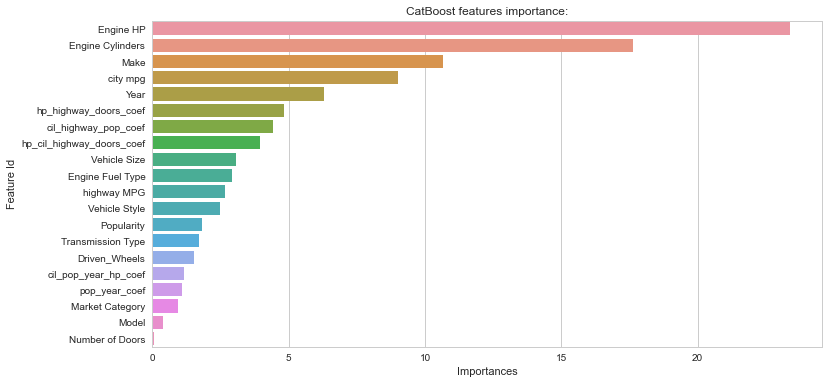

In [485]:
df_feat_imp = ctb_feature_importance(pipeline.steps[1][1])

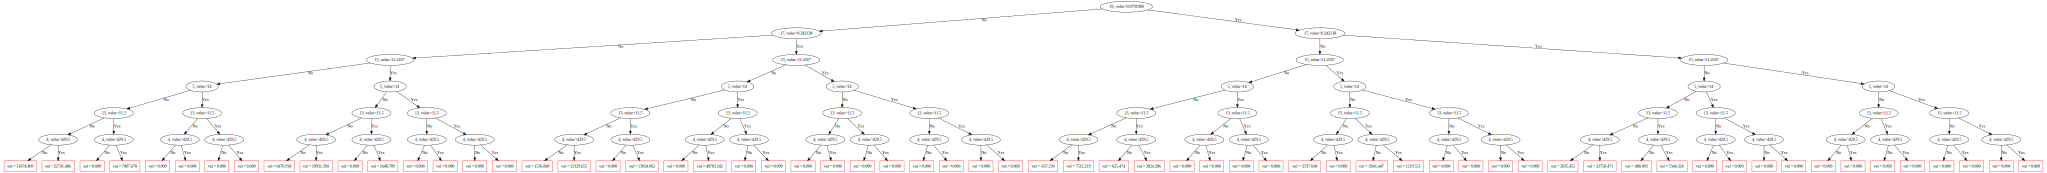

In [486]:
#Visualize the CatBoost decision trees
pipeline.steps[1][1].plot_tree(tree_idx=0)

7. –°–æ—Ö—Ä–∞–Ω–∏—Ç–µ –≤–∞—à—É –º–æ–¥–µ–ª—å –Ω–∞ –¥–∏—Å–∫

In [503]:
with open("hw8_pipeline_model2.dill", "wb") as f:
    dill.dump(pipeline, f)